# AOS 51, Fall 2018, Final Lab Assignment

Download this Notebook and rename it with your name in the title (e.g. "Neil_Berg_Final_Lab_Assignment.ipynb"). 

Email me (nberg@ioes.ucla.edu) your Notebook by 5pm on Friday, December 7, 2018.

Good luck! Remember to review previous lab notes and in-lab exercises and then search Google, Stackoverflow, blog posts, etc. if you get stuck. 

---

In [70]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy import stats

# Problem #1 - Historical Sea Level Rise along the LA Coastline

Rising seas are one of the most alarming aspects of climate change. Sea level rise and flooding impacts to cities like [Miami](https://www.ucsusa.org/global-warming/science-and-impacts/impacts/tidal-flooding-sea-level-rise-miami-dade-county-florida#.WuJ7idMbN0s) receive a lot of attention by scientists and the media. But what's happening to our coastline?

In this problem, we'll examine the last 15 years of sea level heights at the [NOAA Los Angeles ocean measurement station](https://tidesandcurrents.noaa.gov/stationhome.html?id=9410660). 

Below is a list of monthly sea level heights (unit: mm) for the LA coastline spanning January 2003 through December 2017.

Note: sea levels are measured from a [vertical datum](https://tidesandcurrents.noaa.gov/datums.html?id=9410660), which is a defined elevation above the ground. "Negative" sea level heights simply mean below the height of the datum.

In [60]:
slr = [
    3, 71, -47, -17, -32, -6, 9, 16, -15, 67, -5, 2, 19, -23, 49, -5, 35, 31, -18, -16, 59, 29, 20, 37,
    89, 91, 14, 31, 25, -15, 13, 7, -34, -11, -22, -39, -55, -45, -43, 5, 45, 26, 69, 17, 29, 33, 38, 5,
    13, -48, -59, -20, -29, -20, 22, 11, -16, -54, -43, -46, -22, -22, -41, -25, 33, 56, 66, 85, 41, 8, 
    9, 3, -28, -19, 5, 1, 29, 30, 12, 9, 40, 88, 42, 104, 115, 101, 7, 68, -24, -2, -35, -40, -44, -41, 
    -44, 0, -2, -25, -26, 36, 34, 20, 42, 5, -22, -28, -31, -26, -12, -20, -18, 9, 39, 65, -4, 58, 44, 
    44, -2, 11, -47, -41, -5, 36, 42, 29, 23, -8, 27, 37, 33, 25, 51, 9, 55, 78, 104, 98, 76, 45, 116, 
    136, 63, 127, 79, 61, 98, 96, 94, 100, 108, 86, 194, 209, 160, 145, 67, 86, 81, 48, 33, 50, 50, 58, 
    45, 28, 52, 28, 55, 57, 50, 46, 59, 76, 55, 69, 45, 60, 25, 39]

**Q1.1:** Using code, what is the length of this list?

In [61]:
# A1: [enter your code below]
len(slr)

180

**Q1.2.** Create a [Pandas date range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) of monthly dates from January 2003 through December 2017 and assign it to the variable `dates`.

In [62]:
# A2: [enter your code below]
dates = pd.date_range(start='2003-01', end='2017-12', freq='MS')

**Q1.3:** Create a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) called `slr_series` that contains the `slr` list as the Series data and `dates` as the Series Index.

In [63]:
# A3: [enter your code below]
slr_series = pd.Series(data=slr, index=dates)

**Q1.4:** What are the minimum, maximum, and mean sea level heights in this time series?

In [64]:
# A4: [enter your code below]
slr_min, slr_max, slr_mean = slr_series.min(), slr_series.max(), slr_series.mean()
print('Min = {0:.2f} mm \nMax = {1:.2f} mm \nAvg = {2:.2f} mm'.format(slr_min, slr_max, slr_mean))

Min = -59.00 mm 
Max = 209.00 mm 
Avg = 26.69 mm


**Q1.5:** Using the [idxmin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) and [idxmax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html#pandas.Series.idxmax) Pandas Series methods, what dates did the minimum and maximum sea level heights occur?

In [65]:
# A5: [enter your code below]
min_date, max_date = slr_series.idxmin(), slr_series.idxmax()
print('Minimum sea level occured on {0} \nMaximum sea level occured on {1}'.format(min_date, max_date))

Minimum sea level occured on 2007-03-01 00:00:00 
Maximum sea level occured on 2015-10-01 00:00:00


**Q1.6:** Using the [Pandas resample function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html), transform the monthly time series called to an annual time series called `annual_slr` and then compute the annual means.

In [66]:
#Q6 [enter your code below]
annual_slr = slr_series.resample('AS').mean()

**Q1.7:** Compute the trend (with units mm/yr) in sea levels over this 15-year annual time series.

Hint 1: Make sure you create a range of years that serves as the independent or X variable.

Hint 2: [scipy.stats.linregess](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) can ingest a Pandas Series as the dependent or Y variable.

In [67]:
# A7 [enter your code below]
years = np.arange(2003,2017+1)
slope, intercept, r_value, p_value, std_err = stats.linregress(years, annual_slr)
print('SLR trend = {0:.2f} mm/yr'.format(slope))

SLR trend = 5.17 mm/yr


**Q1.8:** Plot the 15-year annual time series and include the trend (which should have units mm per year) in the title.

You may use Pandas or matplotlib to create this time series. 

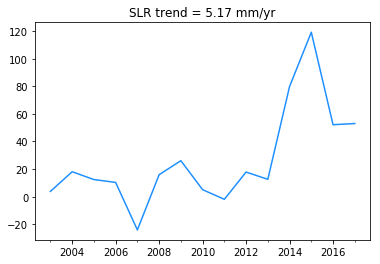

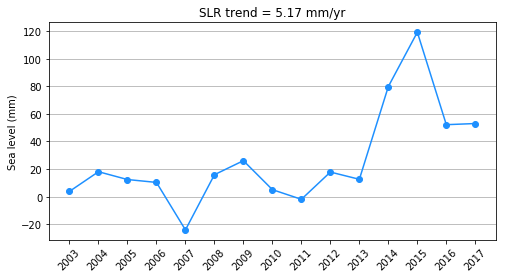

In [68]:
# A8: [enter your code below]

# Using pandas built-in plotting capabilities:
annual_slr.plot(kind='line', color='dodgerblue', title='SLR trend = {0:.2f} mm/yr'.format(slope))

# Using matplotlib
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(years, annual_slr, color='dodgerblue', marker='o')
ax.set_title('SLR trend = {0:.2f} mm/yr'.format(slope))
ax.set_ylabel('Sea level (mm)')
ax.set_xticks(years)
ax.set_xticklabels([str(yr) for yr in years], rotation=45)
ax.yaxis.grid(True)

**Q1.9:** Sea level observations at LA began in the early 20th century. The long-term trend in sea level heights spanning 1925-2017 is around 1 mm/yr. 

Is this long-term trend larger or smaller than the short-term (2003-2017) trend computed in Q1.7? 

What does this say about the importance of using long-term data sets to compute trends in climate data? 

A10 [enter your text below in Markdown]

---
# Problem #2 - Historical and Future Precipitation Patterns 

In this problem, we'll examine historical (1950-1974) and future (2076-2100) patterns of precipitation from the GFDL-CM3 global climate model. This is one of the American models that is maintained by NOAA and Princeton University.  

Download the two data files below from the Google Drive Data folder and move them to a local directory on your machine so you can read them into your Notebook. 

** Data files: **

* **pr_Amon_GFDL-CM3_historical_r1i1p1_195001-197412.nc** (monthly global precip from Jan 1950 - Dec 1974)
* **pr_Amon_GFDL-CM3_rcp85_r1i1p1_207601-210012.nc** (monthly global precip from Jan 2076 - Dec 2100)

** Coding tasks: **

* Read in the global historical precipitation netCDF files
* Extract the precipitation variable and convert it from units kg/m2/s to mm per year 
    * Hint: kg/m2/s is equivalent to mm/s
* Resample monthly precipitation to annual means
* Calculate average historical and future annual precipitation 
* Calculate the change in average annual precipitation in both absolute (unit: mm/year) and relative (unit: %) terms.

** Visualization tasks:**

Create a 2-panel figure (2 rows x 1 column):

* Subplot 1: Map of global historical annual average precipitation (units mm/year)
   * Tip: set the colorbar range from 500 to 2000 mm/yr

* Subplot 2: Map of relative change ((future average - historical average)/historical average * 100) in annual average precipitation (units %)
   * Tip: set the colorbar range from -50% to 50%
   
Remember to use intuitive [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

Make sure that continental coastlines (and optionally, country/state borders) are included in the map. 

** Writing tasks: ** 

Answer the following questions (1 or 2 sentences per question): 

Rainfall specific questions:
* Why are the tropics so wet historically?
* Why are the mid-latitudes also very wet historically?
* Why are the subtropics so dry historically? 
* Which regions generally get wetter in the future?
* Which regions generally get drier in the future?
* How do these figures support the "wet-get-wetter and dry-get-drier" theory of precipitation change discussed in lecture? 

Text(0.5,1,'Change in Precip (%)')

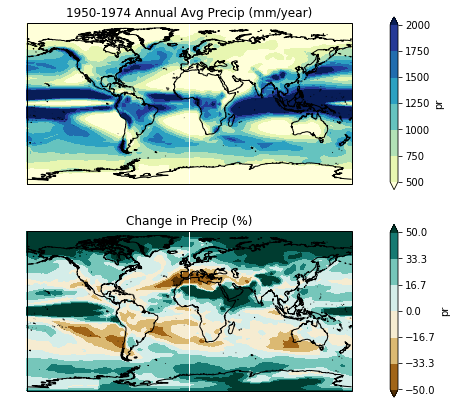

In [117]:
# Read in the netCDF files 
hist_pr_nc = xr.open_dataset('~/AOS51/data/final_project/pr_Amon_GFDL-CM3_historical_r1i1p1_195001-197412.nc')
fut_pr_nc = xr.open_dataset('~/AOS51/data/final_project/pr_Amon_GFDL-CM3_rcp85_r1i1p1_207601-210012.nc')

# Convert from kg/m2/s to mm/yr
hist_pr = hist_pr_nc['pr']* 60 * 60 * 24 * 30 * 12
fut_pr = fut_pr_nc['pr']* 60 * 60 * 24 * 30 * 12

# Resample to annual means
hist_pr_annual = hist_pr.resample(time='AS').mean(dim='time')
fut_pr_annual = fut_pr.resample(time='AS').mean(dim='time')

# Compute the historical and future annual averages 
hist_pr_annual_avg = hist_pr_annual.mean(dim='time')  
fut_pr_annual_avg = fut_pr_annual.mean(dim='time') 

# Changes in precip and evap
abs_change_pr_annual_avg = fut_pr_annual_avg - hist_pr_annual_avg
rel_change_pr_annual_avg = ((fut_pr_annual_avg - hist_pr_annual_avg)/hist_pr_annual_avg) * 100.

# 2-panel figure
# Subplot 1: historical annual average precip 
# Subplot 2: relative change in annual average precip 
fig = plt.figure(figsize=(8,7))

ax1 = fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
hist_pr_annual_avg.plot.contourf(ax=ax1, transform=ccrs.PlateCarree(), cmap='YlGnBu', vmin=500, vmax=2000)
ax1.coastlines('50m')
ax1.set_title('1950-1974 Annual Avg Precip (mm/year)')

ax2 = fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
rel_change_pr_annual_avg.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(), cmap='BrBG', vmin=-50, vmax=50)
ax2.coastlines('50m')
ax2.set_title('Change in Precip (%)')

**Responses**

* Why are the tropics so wet historically?

    - Hadley Cell convergence, surface convergence, lots of moisture = very wet
    
* Why are the mid-latitudes also very wet historically?

    - Eddies, mid-latitude storm track
    
* Why are the subtropics so dry historically? 

    - Mean-meridional overturning circulation descending branch, surface divergence = very dry

* Which regions generally get wetter in the future?

    - Tropics, mid-latitudes, and polar regions

* Which regions generally get drier in the future?

    - Subtropics 

* How do these figures support the "wet-get-wetter and dry-get-drier" theory of precipitation change discussed in lecture? 

    - Historical source regions/areas of surface convergence (tropics/mid-lats/poles) receive even more moisture (since Q scales with C-C), leading to enhanced precip in this aras. 
    - Historical export regions/areas of surface divergence (sub-tropics) export even more moisture. 